# 911 Emergency Calls Analysis

![andrey-kremkov-UtWG73BiwE8-unsplash.jpg](https://i.imgur.com/ruYIZ57.jpg)

Photo by Andrey Kremkov on Unsplash

# 1. Introduction

911 is an emergency telephone number for the North American Numbering Plan (NANP).
Analysing emergency calls dataset and discovering hidden trends and patterns will help in ensuring that the emergency response team is better equipped to deal with emergencies.

Considering road accidents, fire accidents etc, high numbers in specific areas indicate that there is a high demand for ambulance services in those areas. Road accidents in some areas might be due to road conditions which need to be improved. High frequency of emergencies due to respiratory problems might be due to harmful pollutants in the air in that specific area. Association rule mining will thus help in discovering such patterns.

The dataset contains Emergency 911 calls in Montgomery County located in the Commonwealth of Pennsylvania. The attributes chosen include: type of emergency, time stamp, township where the emergency has occurred.


# 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

## Loading Data

In [2]:
data = pd.read_csv('../input/montcoalert/911.csv')

In [3]:
data.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# 3. Data Understanding and Cleaning

In [4]:
data.shape

(645716, 9)

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* Dataset comprises of 631339 observations and 9 fields.

#### It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645716 entries, 0 to 645715
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        645716 non-null  float64
 1   lng        645716 non-null  float64
 2   desc       645716 non-null  object 
 3   zip        567493 non-null  float64
 4   title      645716 non-null  object 
 5   timeStamp  645716 non-null  object 
 6   twp        645434 non-null  object 
 7   addr       645716 non-null  object 
 8   e          645716 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 44.3+ MB


<p style="font-weight: bold;color:#FF4500">Highlights</p>
* Data has float, integer, and object type values.
* Data type of timeStamp is object that need to conver to datetime.

#### In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem.

In [6]:
data.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

<p style="font-weight: bold;color:#FF4500">Highlights</p>
#### The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

**In order to understand the data, we need to analysis each fields carefully :**

* By observation, we can easily get to know that description field contains three information, address, township and station code seperated by semi-column. Address and township tells us location details from where the call has been made to the which Station. Although this information is also captured in the fields 'lat' & 'lng' and 'zip','twp' & 'addr' This information will help rescue team to take actions quickly. 
* timeStamp is provides us information on which date and time the emergency call has been made.
* title field contain the two kind of information separated by colon. First is Reason Categories :- EMS, Fire and Traffic and other is Reason details.
* column 'e' is a dummy variable, whoes value is always 1. So lets drop it as it will not providing us any useful information.
* data type of the objects in the timeStamp column is string, so this change this column from strings to DateTime objects.

In [7]:
data.drop('e', axis=1, inplace=True)

In [8]:
type(data['timeStamp'].iloc[0])

str

In [9]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [10]:
mindate = data["timeStamp"].min()
mindate

Timestamp('2015-12-10 14:39:21')

In [11]:
maxdate = data["timeStamp"].max()
maxdate

Timestamp('2020-06-08 13:14:43')

In [12]:
from dateutil import relativedelta

dif = relativedelta.relativedelta(pd.to_datetime(maxdate), pd.to_datetime(mindate))
print("{} years and {} months".format(dif.years, dif.months))

4 years and 5 months


<p style="font-weight: bold;color:#FF4500">Highlights</p>
* So in a 4 years and 4 months of time span from Dec 2015 to April 2020, about 6.3 hundred people called emergency number 911 to get help in Montgomery County, PA.

#### Now grab specific attributes from a Datetime object 

In [13]:
data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)

In [14]:
data['DayOfWeek'] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [15]:
data['Month'] = data['timeStamp'].apply(lambda time: time.month)

In [16]:
data['Year'] = data['timeStamp'].apply(lambda time: time.year)

In [17]:
data['Date'] = data['timeStamp'].apply(lambda ts:ts.date())

**Notice how the Day of Week is an integer 0-6. We use the map() method with this dictionary to map the actual string names to the day of the week:**

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
data['DayOfWeek'] = data['DayOfWeek'].map(dmap)

In [20]:
data.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,DayOfWeek,Month,Year,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,17,Thu,12,2015,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,17,Thu,12,2015,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,14,Thu,12,2015,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,16,Thu,12,2015,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,16,Thu,12,2015,2015-12-10


## Missing Data

In [21]:
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
zip,78223,12.114149
twp,282,0.043672
Date,0,0.000000
Year,0,0.000000
Month,0,0.000000
DayOfWeek,0,0.000000
Hour,0,0.000000
addr,0,0.000000
timeStamp,0,0.000000
title,0,0.000000


<p style="font-weight: bold;color:#FF4500">Highlights</p>
* Zip has 76817 missing values which is about 12% of total missing values.
* Township has 270 missing values which is only 0.04% of total missing values.
* Except Zip and Township, no other field have any missing values.

Actually there is no ideal way to deal with missing data. However handling missing values is an essential preprocessing task that can drastically deteriorate our model when not done with sufficient care. 

Before starting handling missing values it is important to identify the missing values and know with which value they are replaced. Possible variations of missing values are: ‘NaN’, ‘NA’, ‘None’, ‘ ’, ‘?’ and others. 

Once you know a bit more about the missing data you have to decide whether or not you want to keep entries with missing data. This decision should partially depend on **how random missing values are.**

## 'desc' field : Description of the Emergency Call

As stated earlier 'desc' field contains three information, Address, Township and Station code seperated by semi-column. So lets seperate them out to get the station code, to which the call has been made.

In [22]:
data['station_code'] = data.desc.str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
data['station_code'] = data.station_code.str.replace(':', '')

In [23]:
data['station_code'] = data['station_code'].str.strip()

####  In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. So lets split into Reason Category and Reason.

In [24]:
data['reason_category'] = data['title'].apply(lambda title: title.split(':')[0])

In [25]:
data['reason'] = data['title'].apply(lambda title: title.split(':')[1])

#### So finally our dataset looks like:

In [26]:
data.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,DayOfWeek,Month,Year,Date,station_code,reason_category,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,17,Thu,12,2015,2015-12-10,332,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,17,Thu,12,2015,2015-12-10,345,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,14,Thu,12,2015,2015-12-10,STA27,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,16,Thu,12,2015,2015-12-10,308A,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,16,Thu,12,2015,2015-12-10,329,EMS,DIZZINESS


# 4. Exploratory Data Analysis (EDA)

We do the Exploratory Data Analysis (EDA) of 911 data set to summarize their main characteristics with the help of summary statistics and graphical representations.. This EDA method will help us to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments.

Actually it is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

### Top 5 townships (twp) for 911 calls

In [27]:
data['twp'].value_counts().head(10)

LOWER MERION        54204
ABINGTON            38929
NORRISTOWN          36471
UPPER MERION        35098
CHELTENHAM          29774
POTTSTOWN           26545
UPPER MORELAND      22276
LOWER PROVIDENCE    21837
PLYMOUTH            19533
UPPER DUBLIN        18433
Name: twp, dtype: int64

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* Maximum call has came from LOWER MERION township. We need to further analysis what kind of emergency this area has high demand.

In [28]:
data[data['twp']=='LOWER MERION']['reason_category'].value_counts()

Traffic    23341
EMS        21007
Fire        9856
Name: reason_category, dtype: int64

In [29]:
data[data['twp']=='LOWER MERION']['reason'].value_counts().head(10)

 VEHICLE ACCIDENT -       14394
 FIRE ALARM                4952
 DISABLED VEHICLE -        4921
 VEHICLE ACCIDENT          3289
 ROAD OBSTRUCTION -        2754
 FALL VICTIM               2061
 RESPIRATORY EMERGENCY     1844
 CARDIAC EMERGENCY         1774
 HEAD INJURY               1342
 SUBJECT IN PAIN           1133
Name: reason, dtype: int64

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* This area has a high demand for emergency related to traffic and EMS (Emergency Medical Services). So might be this township require to improve road conditions and medical facilities.

### Most called stations for emergency

In [30]:
dfsc = data['station_code'].value_counts().head(10)
dfsc

308A    24550
329     21224
313     19800
381     15532
345     14040
308     13531
351     12413
317     11802
345B    11791
382     10855
Name: station_code, dtype: int64

In [31]:
data[data['station_code'] == "308A"]['reason_category'].value_counts()

EMS    24550
Name: reason_category, dtype: int64

In [32]:
data[data['station_code'] == "308A"]['reason'].value_counts().head(10)

 RESPIRATORY EMERGENCY        2833
 CARDIAC EMERGENCY            2274
 SUBJECT IN PAIN              2221
 FALL VICTIM                  1651
 UNKNOWN MEDICAL EMERGENCY    1302
 VEHICLE ACCIDENT             1205
 SEIZURES                     1035
 ABDOMINAL PAINS              1003
 OVERDOSE                      984
 ASSAULT VICTIM                984
Name: reason, dtype: int64

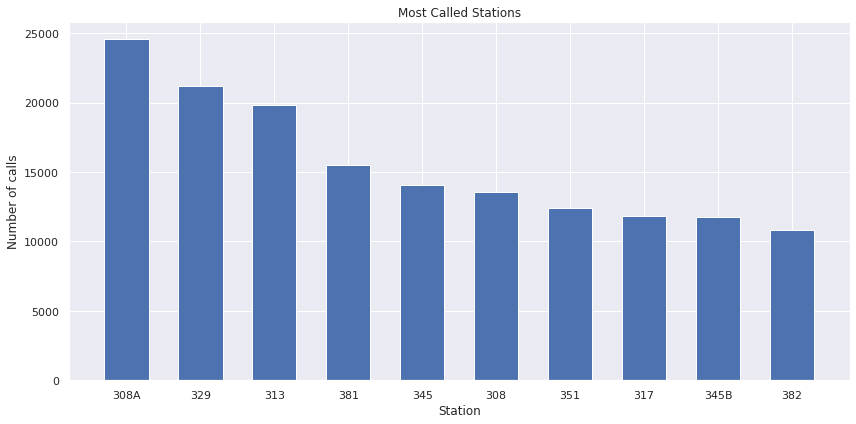

In [33]:
plt.figure(figsize=(12,6))
plt.bar(dfsc.index,dfsc.values,width=0.6)
plt.title("Most Called Stations")
plt.xlabel("Station")
plt.ylabel("Number of calls")
plt.tight_layout()

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* Most of the calls come to stations 308A, 329, 313, 381, and 345

###  Top 10 zipcodes for 911 calls

In [34]:
dfzip = data['zip'].value_counts().head(10)
dfzip

19401.0    44247
19464.0    42630
19403.0    33934
19446.0    31323
19406.0    21865
19002.0    20566
19468.0    18480
19046.0    17441
19454.0    17200
19090.0    16927
Name: zip, dtype: int64

In [35]:
data['zip'].nunique()

201

In [36]:
data[data['zip']==19401.0]['twp'].head(10)

2      NORRISTOWN
3      NORRISTOWN
18     NORRISTOWN
20     NORRISTOWN
32     NORRISTOWN
43     NORRISTOWN
64     NORRISTOWN
78     NORRISTOWN
99     NORRISTOWN
115    NORRISTOWN
Name: twp, dtype: object

In [37]:
data[data['zip']==19401.0]['reason_category'].value_counts()

EMS        28698
Traffic     9641
Fire        5908
Name: reason_category, dtype: int64

In [38]:
data[data['zip']==19401.0]['reason'].value_counts().head()

 VEHICLE ACCIDENT -       7367
 RESPIRATORY EMERGENCY    3413
 CARDIAC EMERGENCY        2810
 SUBJECT IN PAIN          2421
 FALL VICTIM              2402
Name: reason, dtype: int64

In [39]:
data[data['zip']==19401.0].shape[0]

44247

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* Emergency calls has been made from total 197 zip codes.
* Maximum number of emergency calls (43075) have been received from Norristown township having zip code 19401.0
* About 16.8% (7233/43075) emergency calls in this area are related to vehical accidents only. So this area needs to improve in this field to avoid such cases, like reckless driving, driving in bad weather conditions, not stopping while the red light is running etc.

### Top 10 dates of receiving the maximum in calls in all the years:

In [40]:
data['Date'].value_counts().head(10)

2018-03-02    2187
2018-11-15    1662
2020-06-03    1401
2018-03-07     920
2018-03-03     917
2016-01-23     887
2019-11-01     877
2019-07-11     769
2020-01-18     706
2019-02-25     690
Name: Date, dtype: int64

### Most busy year with total number of calls recieved:

In [41]:
data["Year"].value_counts().head(1)

2018    151527
Name: Year, dtype: int64

###  Most common Reason for a 911 call 

In [42]:
data['reason_category'].value_counts().head(5)

EMS        322880
Traffic    225213
Fire        97623
Name: reason_category, dtype: int64

Text(0.5, 1.0, 'Emergency call category')

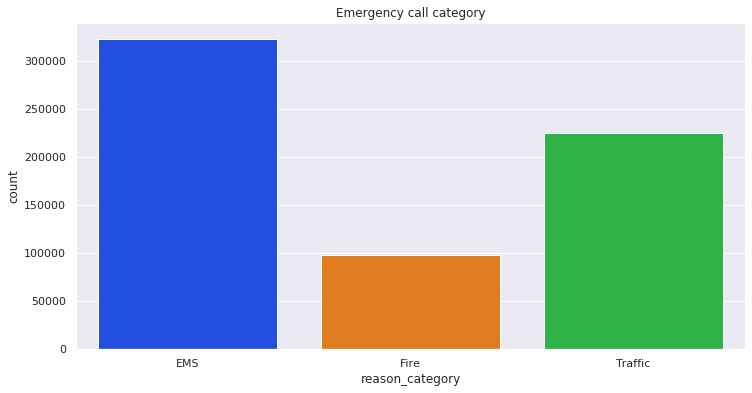

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['reason_category'],data=data, palette='bright')
plt.title("Emergency call category")

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* People called more for medical emergency service rather than others.

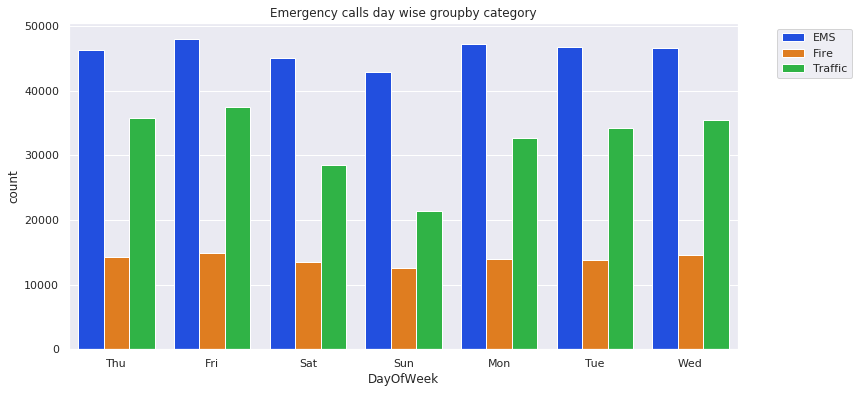

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['DayOfWeek'],data=data,hue=data['reason_category'],palette='bright')
plt.title("Emergency calls day wise groupby category")
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

* Emergency calls is almost equal on all days.

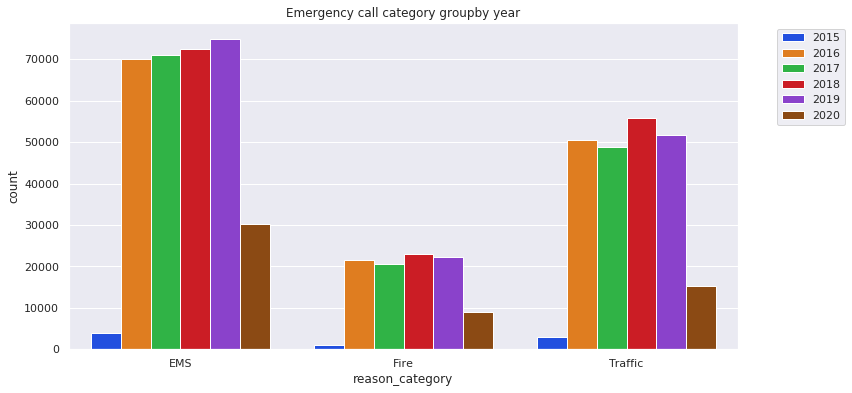

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['reason_category'],data=data,hue=data['Year'],palette='bright')
plt.title("Emergency call category groupby year")
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* Highest emergency service required in the year 2019 for EMS and less for fire.

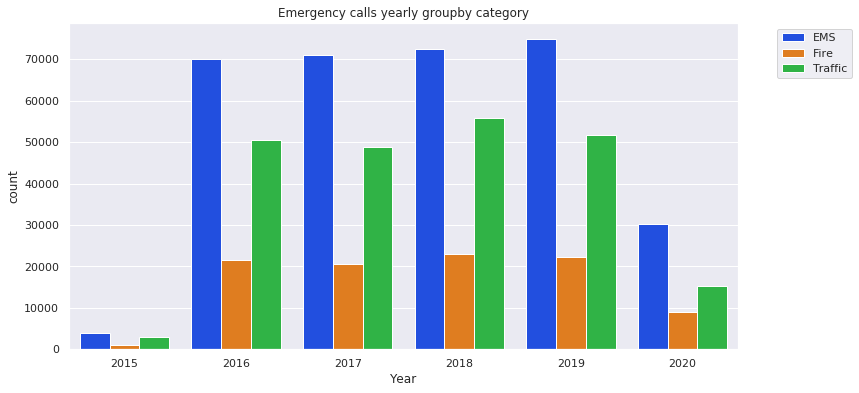

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Year'],data=data,hue=data['reason_category'],palette='bright')
plt.title("Emergency calls yearly groupby category")
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* Emergency calls are almost same throughout the year, except for year 2015 and 2020. Our dataset contains data for only one month of year 2015 and only four months of year 2020. So data is not available for complete year of 2015 and 2020.

**Now I will do the same for Month:**

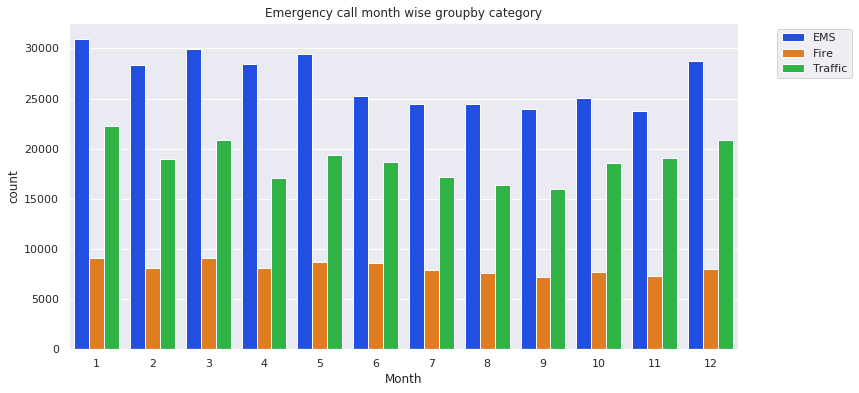

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Month'],data=data,hue=data['reason_category'],palette='bright')
plt.title("Emergency call month wise groupby category")
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

Text(0.5, 1.0, 'Emergency call hour wise groupby category')

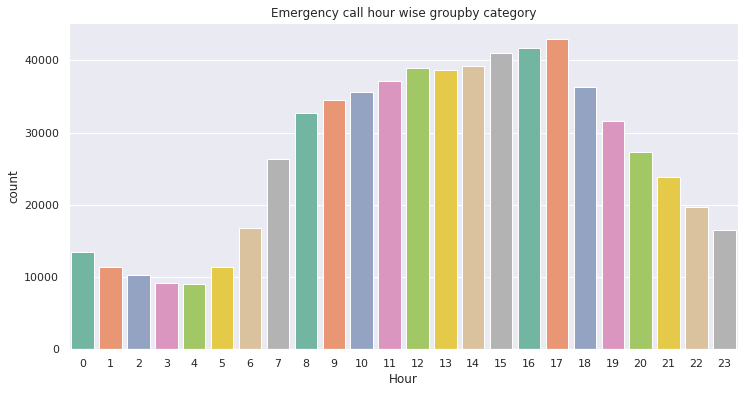

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Hour'],data=data,palette='Set2')
plt.title("Emergency call hour wise groupby category")

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* By seeing the above graph, we can observe that maximum number of emergency calls happend at round 5Pm. We need to find out why at this time only and what kind of emergency is required at this time.

Text(0.5, 1.0, 'Emergency call hour wise groupby category')

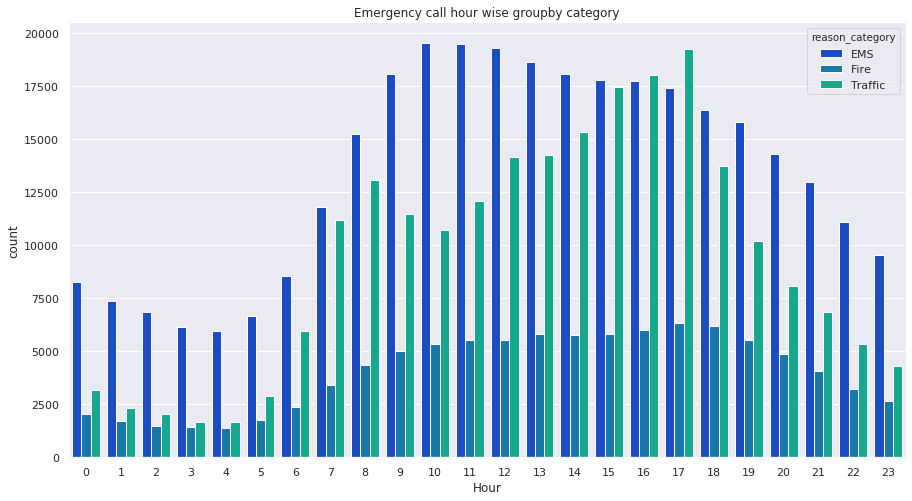

In [49]:
plt.figure(figsize=(15,8))
sns.countplot(x=data['Hour'],data=data,hue=data['reason_category'],palette='winter')
plt.title("Emergency call hour wise groupby category")
#plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* Now by seeing the above graph, it clear that people require maximum number of emergency service due to traffic related problem. This is may be due to people return home from their work place at this time and may find traffic jams, accidents due to signal jumping, rashin driving etc.

### Top 10 reasons for emergency calls

In [50]:
dfRes = data['reason'].value_counts().head(10)
dfRes

 VEHICLE ACCIDENT -       145526
 DISABLED VEHICLE -        46808
 FIRE ALARM                37301
 VEHICLE ACCIDENT          35516
 FALL VICTIM               33548
 RESPIRATORY EMERGENCY     33357
 CARDIAC EMERGENCY         31495
 ROAD OBSTRUCTION -        22445
 SUBJECT IN PAIN           19101
 HEAD INJURY               17708
Name: reason, dtype: int64

In [51]:
data['reason'].nunique()

95

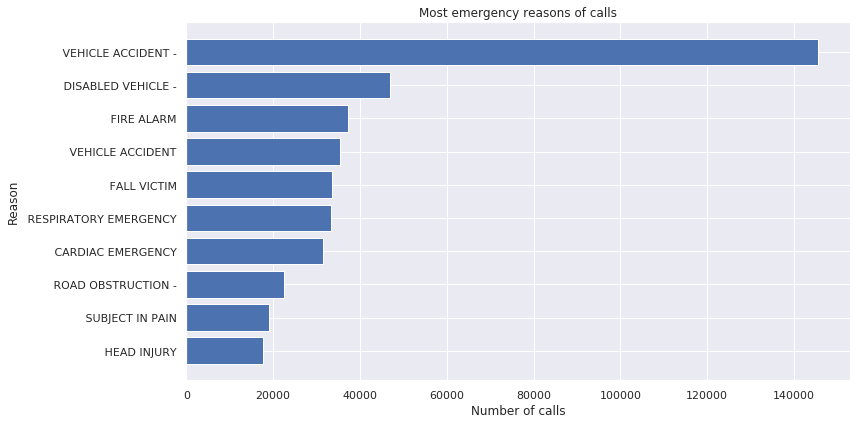

In [52]:
plt.figure(figsize=(12, 6))
x = list(dfRes.index)
y = list(dfRes.values)
x.reverse()
y.reverse()

plt.title("Most emergency reasons of calls")
plt.ylabel("Reason")
plt.xlabel("Number of calls")

plt.barh(x,y)
plt.tight_layout()
plt.show()

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* Highest number of emergency calls are due to vehicals accidents.

### Now group the DataFrame by column and the count() method for aggregation

In [53]:
byMonth = data.groupby('Month').count().sort_values(by='Month',ascending=True)
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,DayOfWeek,Year,Date,station_code,reason_category,reason
Month,,,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,40057,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,36421,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,39124,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,36617,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,38164,57509,57509
6,52489,52489,52489,45865,52489,52489,52462,52489,52489,52489,52489,52489,33847,52489,52489
7,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571,49571,32425,49571,49571
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,32008,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,31240,47213,47213


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

Text(0.5, 1.0, 'Count of calls per month')

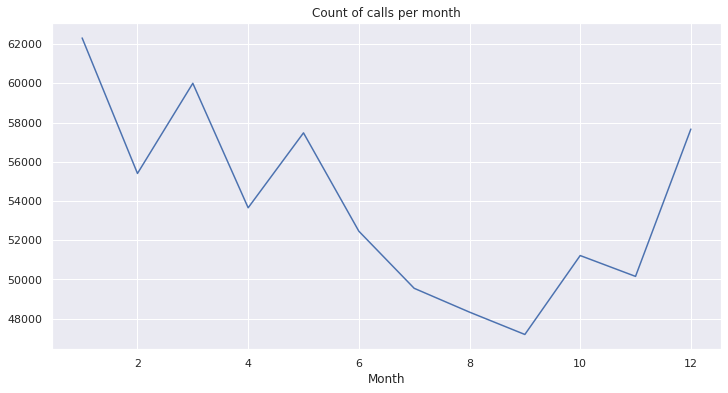

In [54]:
byMonth['twp'].plot(figsize=(12, 6))
plt.title('Count of calls per month')

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* Maximum emergency service required in the months of Jan,Feb, March and Dec, broadly speaking in Winder season. As we already seen above that people require traffic related emergecy service and in winter due to bad weather, fog, less visibility this may cuase more.

### Linear fit on the number of calls per month

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

<Figure size 864x576 with 0 Axes>

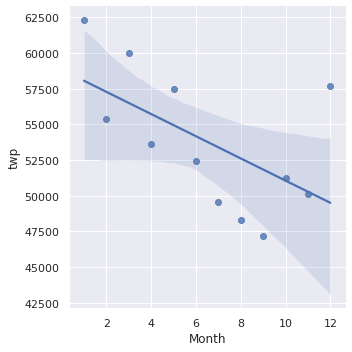

In [55]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

### Now groupby the Date column with the count() aggregate and create a plot of counts of 911 calls.

In [56]:
byDate = data.groupby('Date').count().sort_values(by='Date',ascending=True)
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,DayOfWeek,Month,Year,station_code,reason_category,reason
Date,,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,73,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,254,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,257,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,241,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,260,444,444


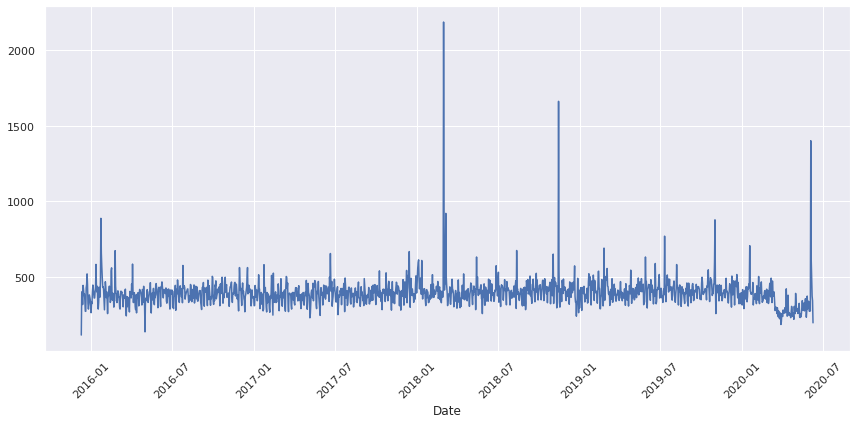

In [57]:
byDate['twp'].plot(figsize=(12,6))
plt.xticks(rotation=45)
plt.tight_layout()

#### Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

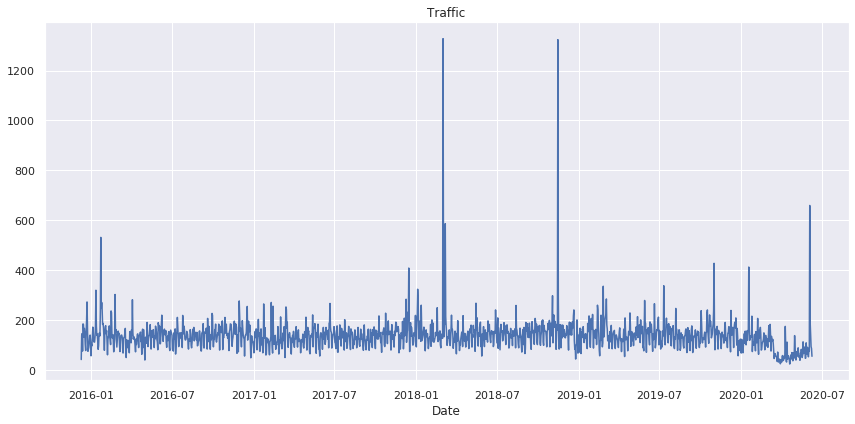

In [58]:
data[data['reason_category']=='Traffic'].groupby('Date').count()['twp'].plot(figsize=(12,6))
plt.title('Traffic')
plt.tight_layout()

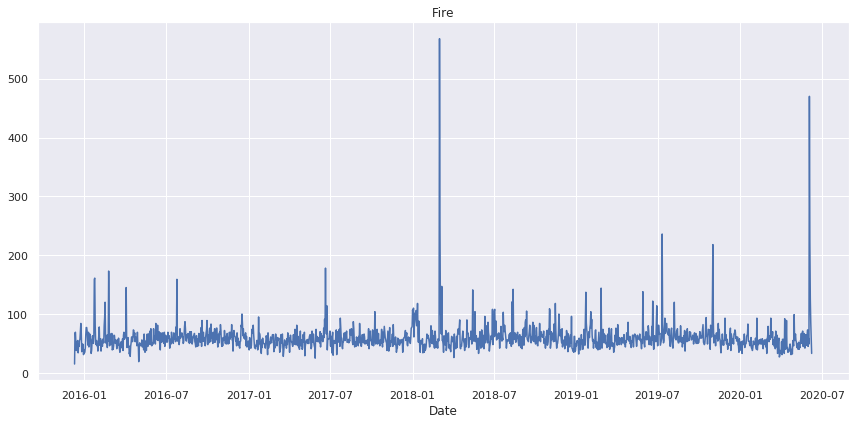

In [59]:
data[data['reason_category']=='Fire'].groupby('Date').count()['twp'].plot(figsize=(12,6))
plt.title('Fire')
plt.tight_layout()

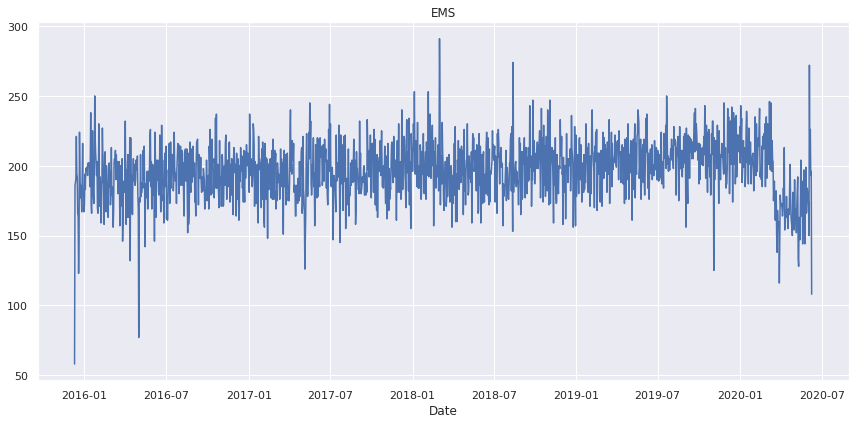

In [60]:
data[data['reason_category']=='EMS'].groupby('Date').count()['twp'].plot(figsize=(12,6))
plt.title('EMS')
plt.tight_layout()

### Heatmap

Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. I will do this by combine the groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.

In [61]:
dayHour = data.groupby(['DayOfWeek','Hour']).count()['reason_category'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,1925,1589,1413,1265,1297,1595,2617,4069,4928,5168,...,6200,6851,6908,6933,5520,4920,4257,3782,3326,2778
Mon,1851,1520,1324,1244,1306,1795,2622,4347,5401,5597,...,5488,6025,6159,6235,5274,4346,3662,3146,2581,2013
Sat,2370,2001,1843,1549,1407,1523,1840,2431,3371,4220,...,5291,5045,5071,5060,4844,4639,4024,3776,3123,2885
Sun,2365,2089,1894,1578,1435,1452,1690,2336,2931,3623,...,4609,4334,4443,4384,4258,4036,3628,3061,2543,2268
Thu,1672,1372,1376,1200,1243,1729,2752,4355,5203,5268,...,5918,6315,6221,6783,5376,4581,3959,3409,2773,2308
Tue,1660,1412,1282,1175,1208,1688,2717,4314,5493,5408,...,5759,6087,6310,6710,5485,4466,3729,3301,2604,2065
Wed,1614,1430,1223,1223,1091,1549,2591,4555,5363,5292,...,5897,6368,6610,6899,5528,4577,4018,3444,2744,2151


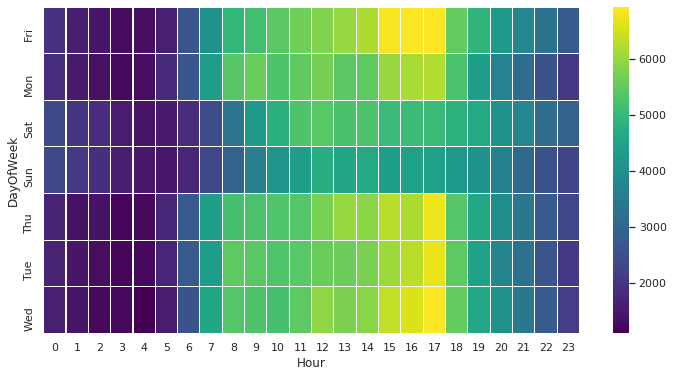

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis',linewidths=.1)

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* Above tells that less emergency service required at night or early morning,while more at evening time and that is even more on Friday. 

Now lets create the cluster graph to check it more precisely.

#### Now create a clustermap using this DataFrame.

<Figure size 864x432 with 0 Axes>

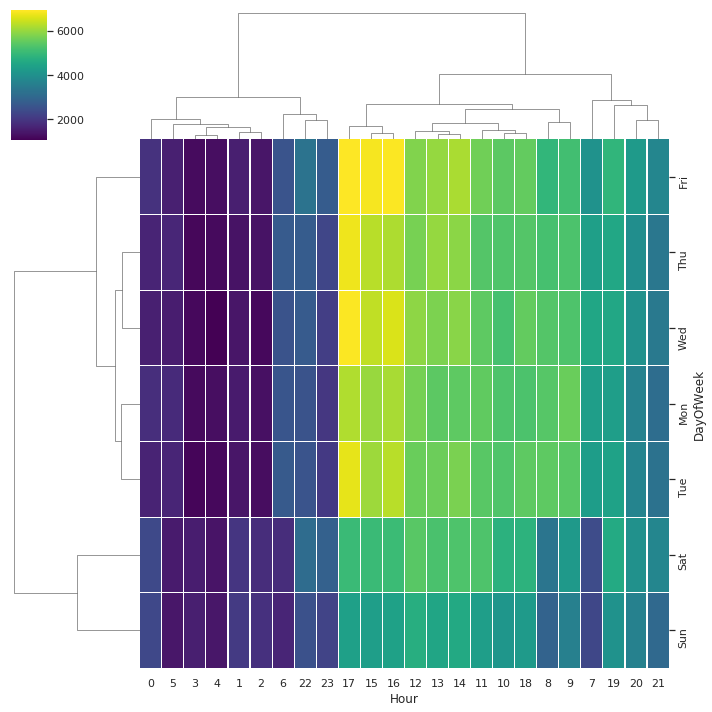

In [63]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour,cmap='viridis',linewidths=.1)

#### Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.

In [64]:
dayMonth = data.groupby(by=['DayOfWeek','Month']).count()['reason_category'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,8139,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,7243,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,7211,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6014,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,8463,6964,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,6963,7637,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,8456,6976,7984,6844,7876,7410,7682


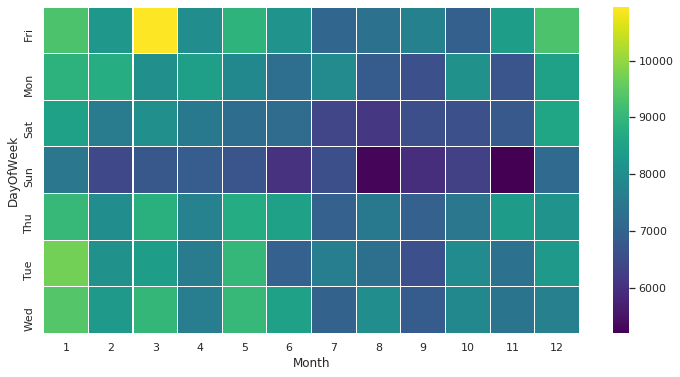

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis',linewidths=.1)

<p style="font-weight: bold;color:#FF4500">Highlights</p>
* People called for emergency services more on Friday's of March month. 

<Figure size 864x432 with 0 Axes>

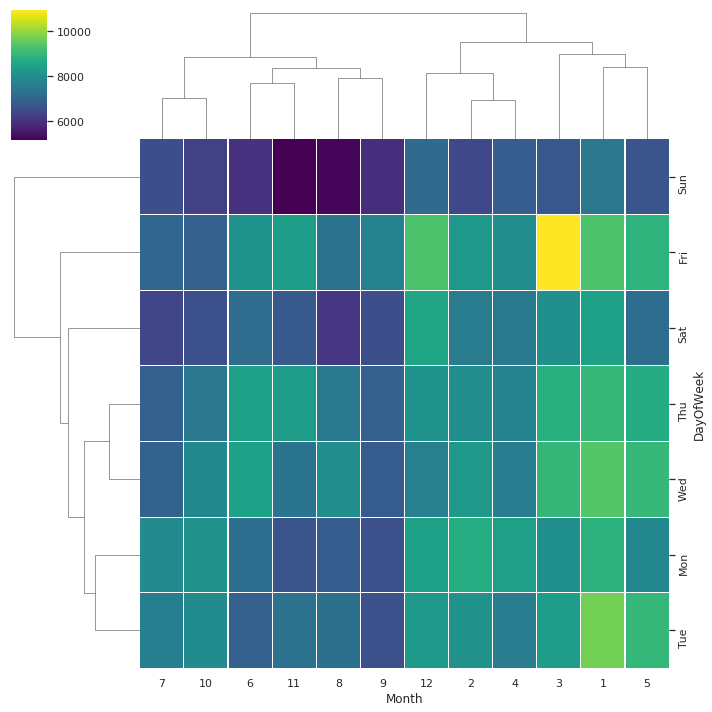

In [66]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth,cmap='viridis',linewidths=.1)

<p style="font-weight: bold;color:#FF4500">Highlights</p>
This cluster graph gives us more precise information now.
* So less emergency service required on Wednesday's of July month.
* People called for emergency services more on Friday's of March month. 

<p style="font-weight:bold;color:#1E90FF;font-size:20px">I welcome comments, suggestions, corrections and of course votes also.</p>